<h1> Word Embeddings and Vectorization </h1>

<h2> Note: use onehot encoding on scoring Column to rep pos, neg, neu values in machine readable format </h2>

<h3> Testing and loading spacy Library for NLP</h3>

<h4> S/N: Use CTRL + F2 to edit multiple occurence of a word in an instance</h4>

In [53]:
from IPython.display import display
import spacy

#spacy.prefer_gpu()    #seems to run/load for a very long time
nlp = spacy.load("en_core_web_sm")

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\spacy\util.py:1636: UserWarning:

[W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu



In [54]:
# Test Create a Doc object
doc = nlp(u'Corona will go very soon. Do not get panic, maintain social distancing and follow the instructions. Cases in U.S. have reduced in last 48 hours')

#Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Corona PROPN nsubj
will AUX aux
go VERB ROOT
very ADV advmod
soon ADV advmod
. PUNCT punct
Do AUX aux
not PART neg
get VERB ROOT
panic NOUN dobj
, PUNCT punct
maintain VERB conj
social ADJ amod
distancing NOUN dobj
and CCONJ cc
follow VERB conj
the DET det
instructions NOUN dobj
. PUNCT punct
Cases NOUN nsubj
in ADP prep
U.S. PROPN pobj
have AUX aux
reduced VERB ROOT
in ADP prep
last ADJ amod
48 NUM nummod
hours NOUN pobj


In [55]:
display(nlp.pipeline)
display(nlp.pipe_names)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1e184d50460>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1e184d50820>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1e1fd0f7350>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1e184c8a600>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1e184c8a300>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1e1fd0f7270>)]

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [56]:
doc3 = nlp("Apple isn't looking at buying U.K. startup.")
for token in doc3:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
. PUNCT punct


# Back to the the model 

# import current Progress in Data

In [57]:
from IPython.display import display
import pandas as pd
import numpy as np

In [58]:
df=pd.read_csv("vader_result_3.2.csv")
df

,comment,topic,m_score,t_score
0,perhaps would would still biden outspoken crit...,take record appear capture trump,pos,neu
1,also fair trial republican witness testify roc...,take record appear capture trump,pos,neu
2,oil company pharmaceutical company willing pay...,senator want unilaterally release,pos,neu
3,okay click expect hear audio audio purpose rep...,take record appear capture trump,neg,neu
4,state treat house differently castle doctrine,organize breakandenter gang arrive tourist,pos,neu
...,...,...,...,...
13809,anti zionism inherently antisemitic define cri...,israel ambassador usa say radical leave college,neg,neu
13810,well lot right wing israeli jew one power diff...,israel ambassador usa say radical leave college,neg,neu
13811,read comment say anything two paragraph follow...,fox friend warns muslim enclave west,neg,pos
13812,israel palestine debate give people socially a...,israel ambassador usa say radical leave college,neg,neu


In [59]:
# Create Function with logic to Engineer Target/label column 

# FUnction testing variables
x = ['pos', 'neg', 'neu', 'neu', 'neg', 'neu']
y = ['neu', 'pos', 'neg', 'pos', 'neg', 'neu']

def t_matrix(y,x):
    
    """ Given Topic Score(y) and Comment score(x) use If/else logic to generate semtiment logic """

    if y == 'pos' and x == 'pos':
        return 'pos'
    elif  y == 'neu' and x == 'pos':
        return 'pos'
    elif  y == 'neg' and x == 'pos':
        return 'neg'
    elif  y == 'pos' and x == 'neu':
        return 'neu'
    elif  y == 'neu' and x == 'neu':
        return 'neu'
    elif  y == 'neg' and x == 'neu':
        return 'neu'
    elif  y == 'pos' and x == 'neg':
        return 'neg'
    elif  y == 'neu' and x == 'neg':
        return 'neg'
    else:
        return 'pos'

#testing function result
for a,b in zip(y,x):
    #t_matrix(a,b)
    print(t_matrix(a,b))

pos
neg
neu
neu
pos
neu


In [60]:
# Testing probable Application Method::::
  #create mini version of data
data = { 'topic':['neu', 'pos', 'neg', 'pos', 'neg', 'neu'],
        'comment':['pos', 'neg', 'neu', 'neu', 'neg', 'neu']
}
df2 = pd.DataFrame(data)
df2

,topic,comment
0,neu,pos
1,pos,neg
2,neg,neu
3,pos,neu
4,neg,neg
5,neu,neu


In [61]:
#convert df column data to array so function can be applied
a = df2['topic'].values
b = df2['comment'].values


In [62]:
#create an array c to store values
c = [t_matrix(a,b) for a,b in zip(a,b)]         #comprehensive function
 #or alternatively
#c = []
#for a,b in zip(a,b):
#    z= t_matrix(a,b)
#    c.append(z)
print(c)

['pos', 'neg', 'neu', 'neu', 'pos', 'neu']


In [63]:
# Store values of C into new column targ
df2['targ'] = c
df2

,topic,comment,targ
0,neu,pos,pos
1,pos,neg,neg
2,neg,neu,neu
3,pos,neu,neu
4,neg,neg,pos
5,neu,neu,neu


# Now implementing the solution on the main dataframe...

In [64]:
df.columns


Index(['comment', 'topic', 'm_score', 't_score'], dtype='object')

In [65]:
a = df['t_score'].values
b = df['m_score'].values
c = [t_matrix(a,b) for a,b in zip(a,b)]  

In [66]:
print(c) 

['pos', 'pos', 'pos', 'neg', 'pos', 'neu', 'pos', 'pos', 'pos', 'pos', 'pos', 'neu', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neu', 'pos', 'pos', 'neg', 'neg', 'neu', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neu', 'neu', 'pos', 'pos', 'neu', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neu', 'neu', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neu', 'pos', 'neg', 'pos', 'neu', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neu', 'neg', 'neu', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neu', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neu', 'neg', 'pos', 'neg', 'neu', 'neg', 'neu', 'neg', 'neu', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neu', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neu', 'pos', 'pos', 'neg', 'pos', 'neg', 'neu'

In [67]:
df['target'] = c
df.head(15)

,comment,topic,m_score,t_score,target
0,perhaps would would still biden outspoken crit...,take record appear capture trump,pos,neu,pos
1,also fair trial republican witness testify roc...,take record appear capture trump,pos,neu,pos
2,oil company pharmaceutical company willing pay...,senator want unilaterally release,pos,neu,pos
3,okay click expect hear audio audio purpose rep...,take record appear capture trump,neg,neu,neg
4,state treat house differently castle doctrine,organize breakandenter gang arrive tourist,pos,neu,pos
5,thats much work seem buzzfeed use make work le...,senator want unilaterally release,neu,neu,neu
6,read record senate floor alright senator get i...,senator want unilaterally release,pos,neu,pos
7,almost certainly suicide trauma body two girl ...,regime critic say saudis try kidnap,neg,neg,pos
8,guess probability young healthy people die inf...,coronavirus suspect case virus,neg,neg,pos
9,well automatic weapon post hospital entrance i...,china coronavirus count artificially make low,neg,neg,pos


<AxesSubplot:title={'center':'Distribution of Target Class setiment orientation'}, ylabel='target'>

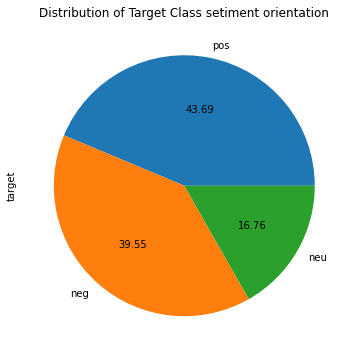

In [68]:
df['target'].value_counts().plot(kind='pie',autopct="%.2f",figsize=(6, 6),title='Distribution of Target Class setiment orientation')

# Now we can generate a word embdedding and use a classification model(naive bayes or a neural network)
<p> Remeber: To analyse a preprocessed data, it needs to be converted into <b>features</b>. Depending upon the usage, text features can be constructed using assorted techniques – <b>Bag of Words, TF-IDF, and Word Embeddings</b>. Read on to understand these techniques in detail.</p>
<p> Supervised Machine learning approaches for sentiment analysis uses methods like <b>logistic regression, Naive Bayes, SVM e.t.c</b></p>
<p>Logistic regression: is a linear model trained on labelled data — the term linear is important because it means the algorithm only uses linear combinations (i.e. sums and not products) of inputs and parameters to produce a class prediction.</p>

<p> I'll be using the <b>Word2Vec Skip-Gram </b> Word Embedding Methods </p>


In [69]:
# first lets load the following libraries
import seaborn as sns 
import matplotlib.pyplot as plt 

# Some Analysis and Visualization before we jump into embedding
<p> Let Visualize and examine the most frequent word in our topic, commments, then most frequent word in negative, positive and neutral comments </p>
<p> We create the next following visuals using the word cloud library</P>

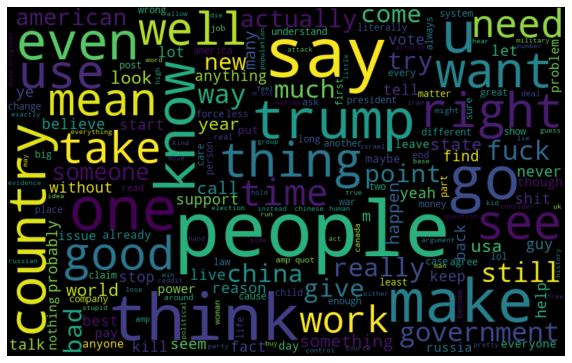

In [70]:
# lets Visualize the all common words within "Comments Column"

all_words = ' '.join([text for text in df['comment']]) # Extract every word in comment column into a list 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

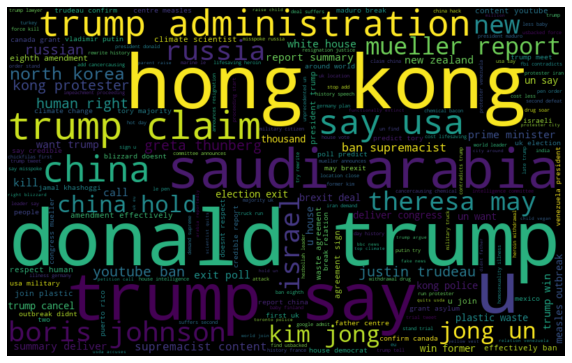

In [71]:
# lets Visualize the all common words within "Topic Column"

all_words = ' '.join([text for text in df['topic']]) # Extract every word in comment column into a list 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

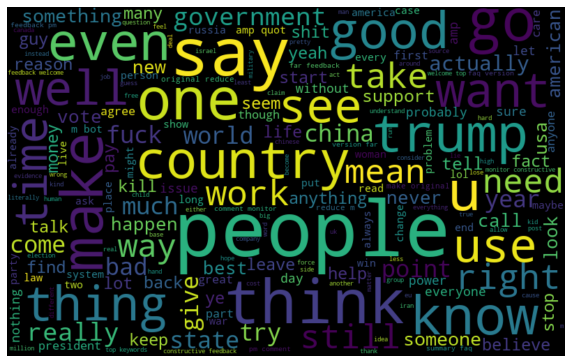

In [72]:
# lets Visualize the all common words within "Positive comments Column"

all_words = ' '.join([text for text in df['comment'][df['target'] == 'pos']]) # Extract every word in comment column into a list 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

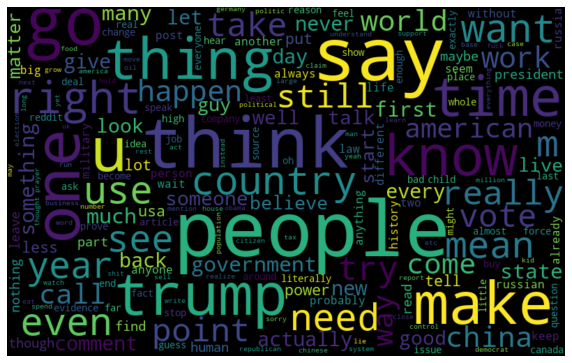

In [73]:
# lets Visualize the all common words within "Neutral comments Column"

all_words = ' '.join([text for text in df['comment'][df['target'] == 'neu']]) # Extract every word in comment column into a list 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

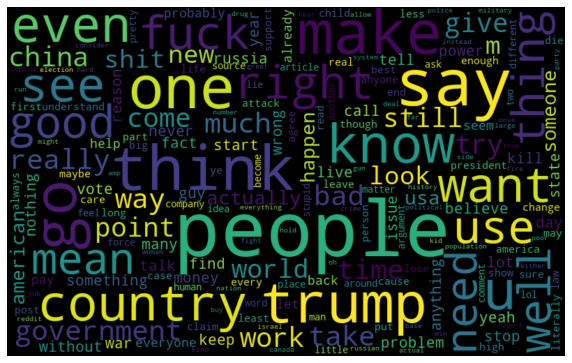

In [74]:
# lets Visualize the all common words within "Negative comments Column"

all_words = ' '.join([text for text in df['comment'][df['target'] == 'neg']]) # Extract every word in comment column into a list 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [75]:
# Plotting the Pie chart of the percentage of different sentiments of all the reddit comments/ class distribution
import plotly.express as px
fig = px.pie(df, names='target', title ='Distribution of Target Class setiment orientation')
fig.show()

19.93564499782829


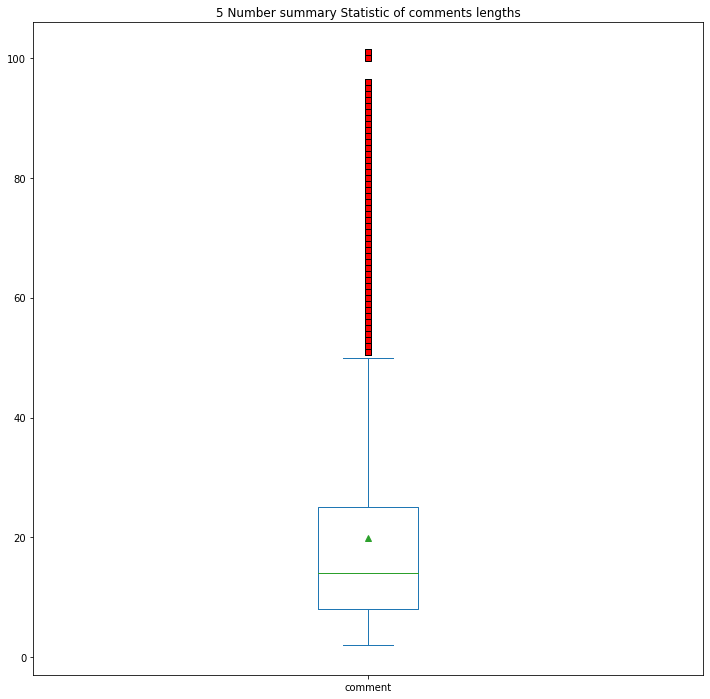

In [76]:
# Plotting the distribution of comments lengths
# Calculate comments lengths
comm_len = pd.Series([len(comment.split()) for comment in df['comment']])

# The distribution of comment text lengths
green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')
comm_len.plot.box(title='5 Number summary Statistic of comments lengths',figsize=(12, 12),flierprops=red_square, vert=True, showmeans=True, label='comment')

# Mean Comment length
import statistics
print(statistics.mean(comm_len))

5.370348921384103


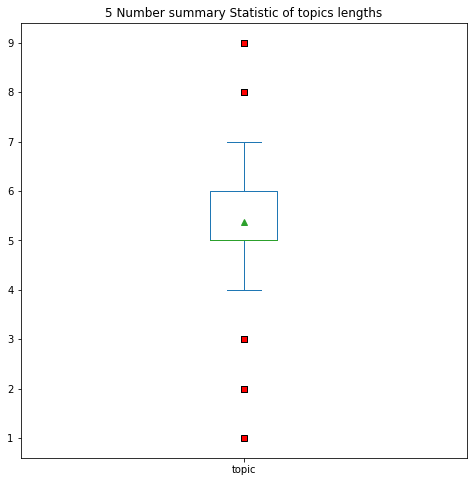

In [77]:
# Plotting the distribution of topics lengths
# Calculate topics lengths
topic_len = pd.Series([len(topic.split()) for topic in df['topic']])

# The distribution of topic text lengths
green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')
topic_len.plot.box(title='5 Number summary Statistic of topics lengths',figsize=(8, 8),flierprops=red_square, vert=True, showmeans=True, label='topic')

print(statistics.mean(topic_len))    #mean topic length

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



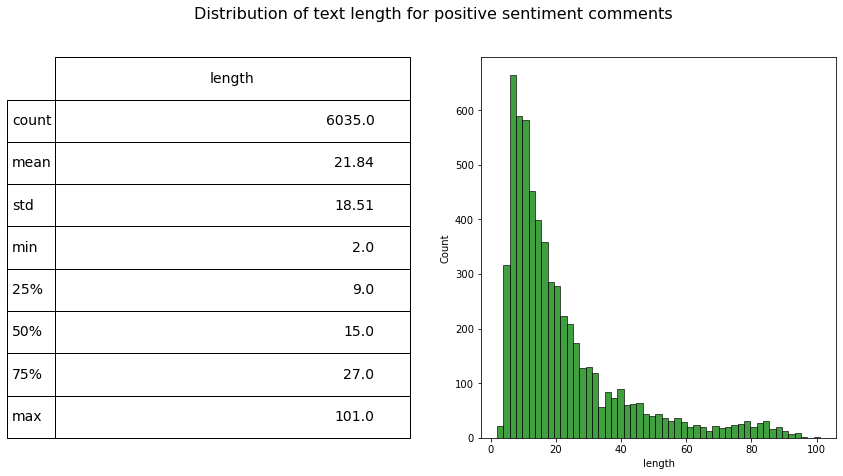

In [78]:
# Plotting the distribution of text length for positive sentiment comments
df_plot = df[['target','comment','topic']]
fig = plt.figure(figsize=(14,7))
df_plot['length'] = df_plot.comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_plot[df_plot['target']=='pos']['length'], ax=ax1,color='green')
describe = df_plot.length[df_plot.target=='pos'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment comments', fontsize=16)

plt.show()

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



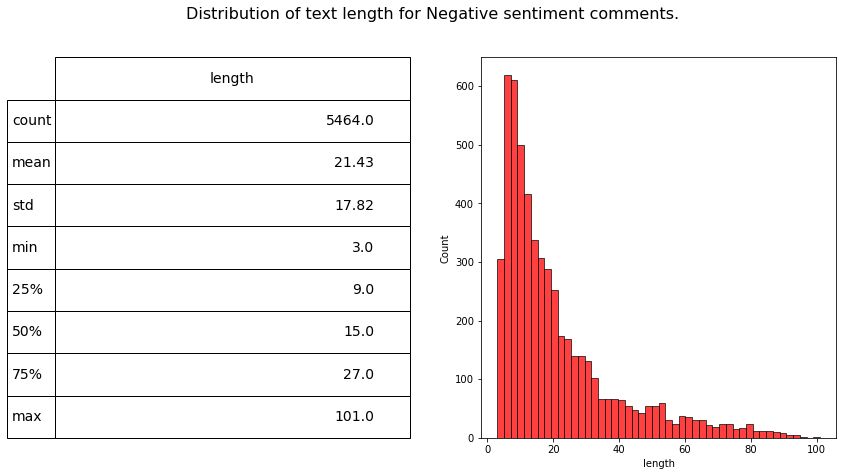

In [79]:
# Plotting the distribution of text length for Negative sentiment comments
df_plot = df[['target','comment','topic']]
fig = plt.figure(figsize=(14,7))
df_plot['length'] = df_plot.comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_plot[df_plot['target']=='neg']['length'], ax=ax1,color='red')
describe = df_plot.length[df_plot.target=='neg'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment comments.', fontsize=16)

plt.show()

C:\Users\malik\miniconda3\envs\tensor2.5\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



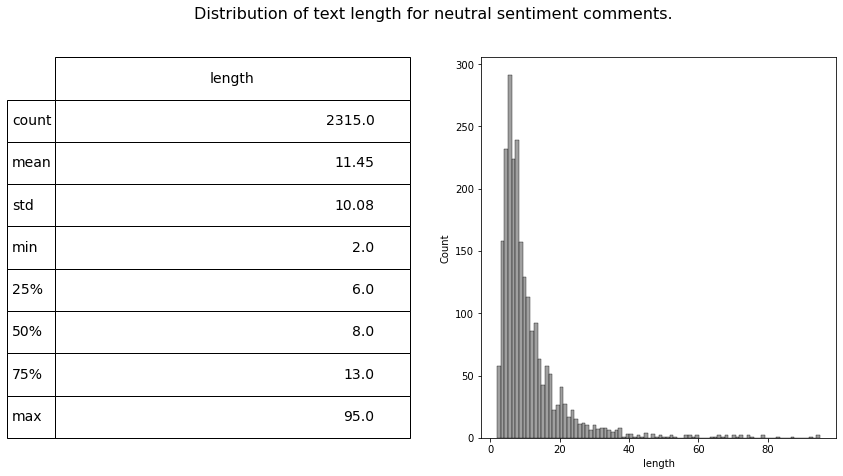

In [80]:
# Plotting the distribution of text length for neutral sentiment comments
df_plot = df[['target','comment','topic']]
fig = plt.figure(figsize=(14,7))
df_plot['length'] = df_plot.comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df_plot[df_plot['target']=='neu']['length'], ax=ax1,color='grey')
describe = df_plot.length[df_plot.target=='neu'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment comments.', fontsize=16)

plt.show()

In [81]:
#..... more visuals 

# Back to embedding.... 

Lets also explore generating a bag of words features and TD-IDF features

In [82]:
# let test out a bag of words features for our model

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['comment'])
print(bow.shape)
bow_df = pd.DataFrame.sparse.from_spmatrix(bow)  #convert sparse matrix to dataframe



# if generating a bow feature for topic limit max feaatures = 500

(13814, 1000)


In [83]:
# Let test out a tf-idf Features for the model
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df['comment'])
print(tfidf.shape)
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf)  #convert sparse matrix to dataframe

(13814, 1000)


# ......

#                'Word2VEc Embedding Feature for the model' 
<h3> Now the reason why word2vec works better for our model is the significant reducion in no of feature required to build the model</h3>
<h3> This is known as Dimensionality reduction</h3>
<h3> If you noticed above using bow and td-idf on both topic and comment would result in a dimensionality set of almost 3000 features </h3>

<h2> Information:</h2>
<p> Word2Vec is not a single algorithm but a combination of two techniques – <b>CBOW (Continuous bag of words) and Skip-gram model</b>. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.</p>
<p> <b>CBOW</b> tends to predict the probability of a word given a context. <i>"A context may be a single adjacent word or a group of surrounding words."</i></p>
<p>The <b>Skip-gram </b> model works in the reverse manner, it tries to predict the context for a given word</p>
<p>The <b>>weights</b> learned by the model are then used as the word-vectors.</p>

<p> We use the Skip-gram model in this project as it has the following advantages:
<li>It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.</li>
<li>Skip-gram with negative sub-sampling outperforms CBOW generally</li> 
</p>

<p>We will train a <b>Word2Vec model</b> on our data to obtain vector representations for all the unique words present in our corpus. <b>Note that there exist</b> option of using pre-trained word vectors instead of 'training our own model'. Some of the freely available pre-trained vectors are:
<li><a href="https://code.google.com/archive/p/word2vec/">Google News Word Vectors</a> </li>
<li><a href="https://code.google.com/archive/p/word2vec/">Freebase names </a> </li>
<li><a href="https://github.com/idio/wiki2vec#prebuilt-models">DBPedia vectors (wiki2vec) </a></li>

But its best we train ours as the size of these pretrained word vectors are humungous
</p>




In [84]:
""" We need to  crate a corpus that consists of word in our comment and topic field.
    We concatenate both columns into a single field and then tokenize it
"""
tokenized_comm = df['comment'].apply(lambda x: x.split()) # tokenizing 
tokenized_topic = df['topic'].apply(lambda x: x.split()) # tokenizing 

joint_corpora = [tokenized_topic,tokenized_comm]
corpus = pd.concat(joint_corpora, axis=0)             #tokenized dataframe consististing of every word in the comment and topic field 
corpus.shape

(27628,)

In [85]:
%%time
# Finally...
import gensim

model_w2v = gensim.models.Word2Vec(corpus,
            vector_size=200,           # desired no. of features/independent variables
            window=5,           # context window size
            min_count=2,        # Ignores all words with total frequency lower than 2.                                  
            sg = 1,             # 1 for skip-gram model
            hs = 0,
            negative = 10,      # for negative sampling
            workers= 32,        # no.of cores
            seed = 34
) 

model_w2v.train(corpus, total_examples= len(corpus), epochs=20)

Wall time: 1min 51s


(6503297, 6991540)

In [86]:
# Testing out the word2vec model and checking its performance
model_w2v.wv.most_similar(positive="drug")

[('anticancer', 0.615687906742096),
 ('trojan', 0.6066615581512451),
 ('groundbreaking', 0.5948845148086548),
 ('molly', 0.5736643075942993),
 ('ecstasy', 0.5709725022315979),
 ('dwi', 0.5702450275421143),
 ('pharmacy', 0.5641070008277893),
 ('lifesaving', 0.5580936074256897),
 ('heroin', 0.5538302063941956),
 ('bookie', 0.550128698348999)]

In [87]:
model_w2v.wv.most_similar(positive="drug")

[('anticancer', 0.615687906742096),
 ('trojan', 0.6066615581512451),
 ('groundbreaking', 0.5948845148086548),
 ('molly', 0.5736643075942993),
 ('ecstasy', 0.5709725022315979),
 ('dwi', 0.5702450275421143),
 ('pharmacy', 0.5641070008277893),
 ('lifesaving', 0.5580936074256897),
 ('heroin', 0.5538302063941956),
 ('bookie', 0.550128698348999)]

In [88]:
# Let’s check the vector representation of any word from our corpus.
model_w2v.wv['trump']

array([-0.09992845, -0.82372254, -0.18248647,  0.28017098,  0.12040143,
        0.03654752, -0.16110371, -0.16074564, -0.4067036 , -0.18331374,
        0.05171639,  0.20522667,  0.03606274,  0.16700272,  0.01489329,
       -0.02871491, -0.40620002,  0.20853423, -0.06044785,  0.29212058,
       -0.28509665,  0.47280496,  0.04863345,  0.26288682,  0.1570009 ,
        0.3756202 , -0.00605583,  0.0889532 ,  0.35226816,  0.53925383,
       -0.25295317,  0.46379918,  0.5620043 , -0.1380731 ,  0.38591105,
       -0.03833574,  0.21838433, -0.23533125,  0.23427467,  0.7411339 ,
        0.2642328 , -0.44578695,  0.34892812, -0.01193277,  0.20638959,
        0.3809482 ,  0.3739027 , -0.05788687, -0.28247872, -0.23203224,
       -0.34750506, -0.09205906,  0.28187984, -0.5674232 ,  0.13973692,
       -0.05281173,  0.30861956,  0.01481446,  0.26391685, -0.5303256 ,
        0.1920758 ,  0.20660046,  0.676762  , -0.13428338,  0.05277354,
       -0.21484284, -0.09595982, -0.24387646, -0.14085747,  0.03

In [89]:
# lenght of the vector
len(model_w2v.wv['trump'])

200

<h3> Preparing Vector for Comments: </h3>
<p> Since our data contains tweets and not just words, we’ll have to figure out a way to <b>use the word vectors from word2vec model to create vector representation for an entire tweet</b>.</p>

There is a simple solution to this problem, we can simply take mean of all the word vectors present in the comment.

The length of the resultant vector will be the same, i.e. 200.

We will repeat the same process for all the comments in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [90]:
def word_vector(tokens, size):
    """function to create a vector for each comment by taking the average of the vectors of the words present in the comment."""
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [91]:
# Generating Word2vec feature set for 'comments'
wordvec_arrays = np.zeros((len(tokenized_comm), 200)) 
for i in range(len(tokenized_comm)):
    wordvec_arrays[i,:] = word_vector(tokenized_comm[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(13814, 200)

<h5> Thus we can see above that we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features. </h5>

# Now Repeat process for 'topic' column

In [92]:
%%time
# Reusing the word2vec model built on the combined corpus

# Reusing the wordvector() funtion
# Generate a Word2vec feature set for 'topic' column
wordvec_arrays = np.zeros((len(tokenized_topic), 200)) 
for i in range(len(tokenized_topic)):
    wordvec_arrays[i,:] = word_vector(tokenized_topic[i], 200)
wordvec_df1 = pd.DataFrame(wordvec_arrays)
wordvec_df1.shape


Wall time: 1.16 s


(13814, 200)

In [93]:
# testing out more similarity in embedding model
model_w2v.wv.most_similar(positive="trump")

[('farrow', 0.6031492352485657),
 ('ronan', 0.6018711924552917),
 ('longrumored', 0.5867196917533875),
 ('henchman', 0.5643725395202637),
 ('farce', 0.5313020944595337),
 ('highspeed', 0.5161996483802795),
 ('optic', 0.5147188305854797),
 ('extrump', 0.5083461403846741),
 ('obamaera', 0.5008020997047424),
 ('donald', 0.5002955198287964)]

In [94]:
# checking the vector representation of any word from our corpus.
model_w2v.wv['china']

array([ 0.45070004,  0.22237597, -0.11210757, -0.54836243, -0.44481322,
       -0.01321862, -0.22513223, -0.24558593,  0.86720186, -0.15959217,
        0.41487172,  0.07078735,  0.41338974, -0.11069167, -0.11455226,
        0.19559729, -0.10200384,  0.6311039 , -0.77287763, -0.04925943,
        0.30854842,  0.7253311 , -0.10402424,  0.24759093,  0.3061248 ,
       -0.04044852,  0.35697243, -0.91850764, -0.02347282, -0.02183669,
        0.4226988 , -0.3692905 ,  0.9369236 , -0.5948261 ,  0.73103285,
       -0.00356751, -0.5849886 , -0.2528144 ,  0.10218846,  0.2435178 ,
        0.5402069 ,  0.21020246,  0.3251765 ,  0.7796802 ,  0.28625262,
       -0.4481877 ,  0.5141029 ,  0.27018118,  0.21641715, -0.29929206,
       -0.00108105, -0.22711419,  0.12441015,  0.67294586, -0.20633347,
        0.32158738,  0.09715547, -0.07734536,  0.06654788, -0.3504523 ,
        0.24986719, -0.03046557,  0.08392005, -0.15724748,  0.32037655,
        0.04532206,  0.35711133, -0.15694895, -0.08062596, -0.22

In [95]:
# checking the lenght of vectors
len(model_w2v.wv['china'])

200

In [96]:
# Save Word2vec model
model_w2v.save("word2vec.model")

<h3> Next: We one hot encode the categorical variables in the main dataframe (df) </h3>

In [97]:
df

,comment,topic,m_score,t_score,target
0,perhaps would would still biden outspoken crit...,take record appear capture trump,pos,neu,pos
1,also fair trial republican witness testify roc...,take record appear capture trump,pos,neu,pos
2,oil company pharmaceutical company willing pay...,senator want unilaterally release,pos,neu,pos
3,okay click expect hear audio audio purpose rep...,take record appear capture trump,neg,neu,neg
4,state treat house differently castle doctrine,organize breakandenter gang arrive tourist,pos,neu,pos
...,...,...,...,...,...
13809,anti zionism inherently antisemitic define cri...,israel ambassador usa say radical leave college,neg,neu,neg
13810,well lot right wing israeli jew one power diff...,israel ambassador usa say radical leave college,neg,neu,neg
13811,read comment say anything two paragraph follow...,fox friend warns muslim enclave west,neg,pos,neg
13812,israel palestine debate give people socially a...,israel ambassador usa say radical leave college,neg,neu,neg


In [98]:
# One Hot encoding MultiLabel Categorical Variables:
# first convert  m_score and t_score columns into 2d array
mlab = ['m_score','t_score']
x_multi = df[mlab].values
x_multi

array([['pos', 'neu'],
       ['pos', 'neu'],
       ['pos', 'neu'],
       ...,
       ['neg', 'pos'],
       ['neg', 'neu'],
       ['neu', 'neg']], dtype=object)

In [99]:
print(x_multi[:,0]) #returns all rows of data for first column

print(x_multi[:,1]) #returns all rows of data for second column


['pos' 'pos' 'pos' ... 'neg' 'neg' 'neu']
['neu' 'neu' 'neu' ... 'pos' 'neu' 'neg']


In [100]:
#lets take all items in array that reps married column:
x_multi[:,0].reshape(-1,1) #reshaping at -1,1 kinda flattens out the data into a 'single column' with 'multirow' structure

#so moving on....
from sklearn.preprocessing import OneHotEncoder
from numpy.lib import recfunctions
# Needed for the function to convert from structured to unstructured ndarray

# Encode Married
enc = OneHotEncoder()
fp1 = x_multi[:,0].reshape(-1,1)
enc.fit(fp1)
codedfp1 = enc.transform(fp1).toarray()

codedfp1

# Encode Education
enc = OneHotEncoder()
fp2 = x_multi[:,1].reshape(-1,1)
enc.fit(fp2)
codedfp2 = enc.transform(fp2).toarray()

codedfp2

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [101]:
# Combine/join one hot encoded arrays coded fP1 &fp2 on axis = '1':'column'
coded_join = np.concatenate([codedfp1, codedfp2], axis=1)
coded_join

array([[0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [102]:
### Now convert one-hot-encoded array of vectors into dataframe 

model_df = pd.DataFrame(coded_join,  columns = ['a','b','c','d','e','f'])
model_df


,a,b,c,d,e,f
0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
13809,1.0,0.0,0.0,0.0,1.0,0.0
13810,1.0,0.0,0.0,0.0,1.0,0.0
13811,1.0,0.0,0.0,0.0,0.0,1.0
13812,1.0,0.0,0.0,0.0,1.0,0.0


<h4>FInal task : concat 'wordvec_df' and 'wordvec_df1' dataframes to the -> 'main df' and store in a csv file to be processed in the modelling stage</h4>
<p><b> FInal no of column should be = 200+200+6+1=407 </b></p>

In [103]:
# Use pandas.concat to perform dataframe concatenation along columns i.e axis = 1
model_df = pd.concat([df['target'],model_df,wordvec_df,wordvec_df1], axis=1)
model_df


,target,a,b,c,d,e,f,0,1,2,...,190,191,192,193,194,195,196,197,198,199
0,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.017109,-0.238943,0.162469,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
1,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.051815,-0.113376,0.018852,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
2,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.060451,-0.172936,-0.026294,...,0.327560,-0.166819,0.042079,-0.034599,0.029893,0.282038,-0.139885,0.186054,0.193534,-0.047213
3,neg,1.0,0.0,0.0,0.0,1.0,0.0,-0.049010,-0.311965,0.169213,...,-0.210758,-0.143869,-0.042304,-0.194833,-0.047312,0.333067,0.017274,0.100887,0.197245,0.005664
4,pos,0.0,0.0,1.0,0.0,1.0,0.0,0.166559,-0.271395,0.264561,...,0.226036,-0.187280,0.364145,0.215561,-0.072055,-0.327634,-0.127996,0.290648,-0.068311,0.529654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13809,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.227720,-0.169876,-0.029033,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830
13810,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.199832,-0.413089,0.040101,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830
13811,neg,1.0,0.0,0.0,0.0,0.0,1.0,0.048078,-0.337632,-0.105340,...,0.101448,-0.192111,0.098484,0.211544,-0.106624,-0.123411,-0.118704,0.034215,0.091403,0.047239
13812,neg,1.0,0.0,0.0,0.0,1.0,0.0,0.120930,-0.458627,0.008752,...,0.409466,-0.154213,-0.003561,-0.166231,-0.021191,0.191070,-0.041415,0.078364,-0.049340,-0.024830


In [104]:
# Save DataFrame to csv file:
model_df.to_csv("model_data_4.csv", index=False)

# .... The End

<h4> S/N: Doc2Vec Embedding:</h4>
Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents.

This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. 

This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

<p> Doc2Vec embedding isn't needed for my project but its worth exploring as well: see link <a href:"https://www.kaggle.com/nitin194/twitter-sentiment-analysis-word2vec-doc2vec">  Twitter Sentiment Analysis - word2vec, doc2vec</a>  </p>
